# PRINCIPAL COMPONENT ANALYSIS

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# we shall PCA algorithm on cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.keys()   # to see what all components the sklearn holds about the dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Description of the dataset
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# Now we load the data of the cancer dataset to a dataframe
df = pd.DataFrame(cancer['data'], columns= cancer.feature_names)
df[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

# to see the dimension of the data

(569, 30)

* We see that it has 569 observations and 30 attributes

In [7]:
cancer.target_names

# these are the target names which aren't stored in dataframe, because we need numerical values in the dataframe to work on PCA

array(['malignant', 'benign'], dtype='<U9')

In [8]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

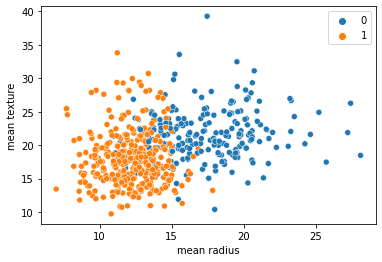

In [9]:
sns.scatterplot(x='mean radius', y='mean texture', data=df, hue= cancer['target'])

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

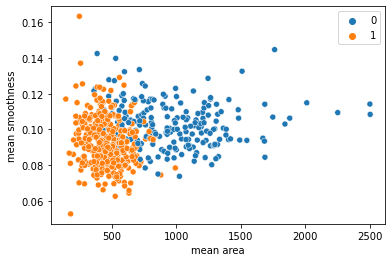

In [10]:
sns.scatterplot(x='mean area', y='mean smoothness', data=df, hue= cancer['target'])

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

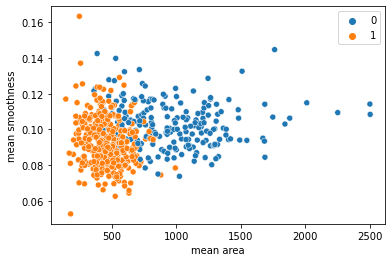

In [11]:
sns.scatterplot(x='mean area', y='mean smoothness', data=df, hue= cancer['target'])

* we can see the limitation we have while plotting, the dataset is of 30 features
* But we can represent maximum only of 3D plot
* So we can reduce the number of features represented by keeping most of it's information

**PCA**

In [12]:
# Scaling the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_feat = scaler.transform(df)

In [13]:
scaled_feat[:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [14]:
# now we shall create a model for PCA
from sklearn.decomposition import PCA
model = PCA(n_components=2)

# n_components parameters basically take the value to which dimension the data has to be compressed/ converted

In [15]:
# We train the model
model.fit(scaled_feat)

PCA(n_components=2)

In [16]:
# Now we shall the transform the trained data into 2 dimension
model_compressed = model.transform(scaled_feat)

In [17]:
# Now let's look at the dimensions of before and after
print("Original scaled values dimensions:", scaled_feat.shape)
print("PCA transformed dimensions:", model_compressed.shape)

Original scaled values dimensions: (569, 30)
PCA transformed dimensions: (569, 2)


* We can clearly see that we had 30 dimensions before compression
* Now after doing PCA we have approximated 30 features in 2 features 
* That's the reason why PCA is one of the most powerful agorithms out there

Text(0, 0.5, 'Second principal component')

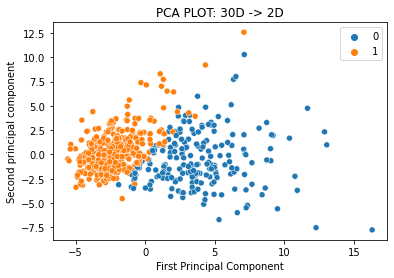

In [18]:
# PCA plot
sns.scatterplot(x=model_compressed[:,0], y=model_compressed[:,1], hue= cancer.target)
plt.title("PCA PLOT: 30D -> 2D")
plt.xlabel("First Principal Component")
plt.ylabel("Second principal component")

* We can see that the classification looks much cleaner than before
* and this also composes of all 30 features with it's corresponding values in the scatterplot

In [19]:
model.components_ # these are the values of each principal component of all 30 features

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [20]:
df_components = pd.DataFrame(model.components_, columns= cancer.feature_names)
df_components[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


From this we can see the values/ loading scores of all the features of both the principal components

In [21]:
model.explained_variance_ratio_*100    # gives the variance of the PC1 and PC2

array([44.27202561, 18.97118204])

* We have 44% of variation from PC1
* we have 19% of variation from PC2
* So in total we have around 63% of variation of entire dataset
* since the data was small and had many features it had resulted this much total variation

<AxesSubplot:>

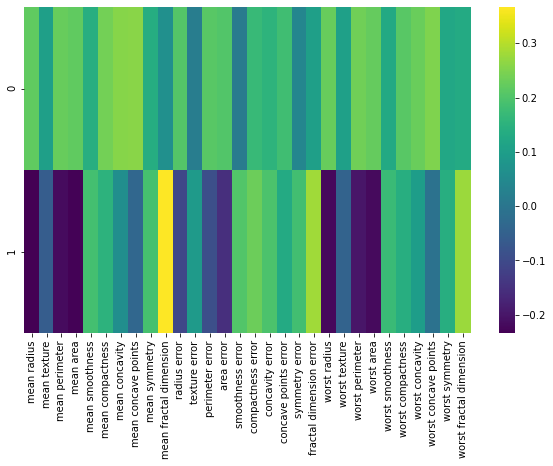

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df_components, cmap='viridis')

From this heatmap we can see which component of PCA has better variation

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_compressed, cancer.target)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
pred = rfc.predict(X_test)
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[47  3]
 [ 6 87]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        50
           1       0.97      0.94      0.95        93

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



* we can see that we can perform any ML models on these compressed/ transformed values  which makes the exection time faster